In [1]:
import types
import pandas as pd

# data_bess = pd.read_csv ('../Imports/bess-actuators.csv',sep=';')
data = pd.read_csv ('../Imports/bess-bms.csv',sep=';')

data.head()

,Timestamp,Id,BmsStatus,BmsInformation,GlobalBattery_Voltage,GlobalBattery_Current,GlobalBattery_Soc,GlobalBattery_Soh,GlobalBattery_Statistic_VoltageMean,GlobalBattery_Statistic_VoltageMax,...,Bstring2_Bmu_Temperature_281,Bstring2_Bmu_Temperature_282,Bstring2_Bmu_Temperature_283,Bstring2_Bmu_Temperature_284,Bstring2_Bmu_Temperature_285,Bstring2_Bmu_Temperature_286,Bstring2_Bmu_Temperature_287,Bstring2_Status,Energy_Charge,Energy_Discharge
0,2020-09-01T16:49:41,NaN,Status Normal,Normal,605.70,3.2,95.0,99,2.13,2.22,...,0,0,0,23,0,0,0,True,37,689
1,2020-09-01T16:49:42,NaN,Status Normal,Normal,605.75,3.2,95.0,99,2.13,2.22,...,0,0,0,23,0,0,0,True,37,689
2,2020-09-01T16:49:43,NaN,Status Normal,Normal,605.75,3.2,95.0,99,2.13,2.22,...,0,0,0,23,0,0,0,True,37,689
3,2020-09-01T16:49:44,NaN,Status Normal,Normal,605.75,3.2,95.0,99,2.13,2.22,...,0,0,0,23,0,0,0,True,37,689
4,2020-09-01T16:49:45,NaN,Status Normal,Normal,605.70,3.2,95.0,99,2.13,2.22,...,0,0,0,23,0,0,0,True,37,689


In [2]:
data.describe()

,Id,GlobalBattery_Voltage,GlobalBattery_Current,GlobalBattery_Soc,GlobalBattery_Soh,GlobalBattery_Statistic_VoltageMean,GlobalBattery_Statistic_VoltageMax,GlobalBattery_Statistic_VoltageArgmax,GlobalBattery_Statistic_VoltageMin,GlobalBattery_Statistic_VoltageArgmin,...,Bstring2_Bmu_Temperature_280,Bstring2_Bmu_Temperature_281,Bstring2_Bmu_Temperature_282,Bstring2_Bmu_Temperature_283,Bstring2_Bmu_Temperature_284,Bstring2_Bmu_Temperature_285,Bstring2_Bmu_Temperature_286,Bstring2_Bmu_Temperature_287,Energy_Charge,Energy_Discharge
count,0.0,23939.000000,23939.000000,23939.000000,23939.0,23939.000000,23939.000000,23939.000000,23939.000000,23939.000000,...,23939.000000,23939.0,23939.0,23939.0,23939.000000,23939.0,23939.0,23939.0,23939.000000,23939.000000
mean,NaN,595.697146,11.527457,63.672653,99.0,2.096766,2.159157,385.438657,2.078124,431.791595,...,24.354986,0.0,0.0,0.0,23.238941,0.0,0.0,0.0,264.453611,461.543506
std,NaN,31.244031,136.682005,15.672003,0.0,0.109933,0.112952,68.002700,0.122153,183.682084,...,0.478519,0.0,0.0,0.0,0.426445,0.0,0.0,0.0,114.560661,114.562521
min,NaN,556.340000,-161.390000,39.500000,99.0,1.960000,2.010000,46.000000,1.910000,20.000000,...,24.000000,0.0,0.0,0.0,23.000000,0.0,0.0,0.0,37.000000,287.000000
25%,NaN,567.400000,-131.900000,50.650000,99.0,2.000000,2.060000,406.000000,1.970000,518.000000,...,24.000000,0.0,0.0,0.0,23.000000,0.0,0.0,0.0,194.000000,364.000000
50%,NaN,602.950000,3.500000,62.150000,99.0,2.120000,2.180000,406.000000,2.080000,518.000000,...,24.000000,0.0,0.0,0.0,23.000000,0.0,0.0,0.0,276.000000,450.000000
75%,NaN,622.300000,138.890000,73.590000,99.0,2.190000,2.250000,406.000000,2.190000,518.000000,...,25.000000,0.0,0.0,0.0,23.000000,0.0,0.0,0.0,362.000000,532.000000
max,NaN,679.300000,219.200000,95.000000,99.0,2.390000,2.560000,406.000000,2.360000,565.000000,...,25.000000,0.0,0.0,0.0,24.000000,0.0,0.0,0.0,439.000000,689.000000


In [3]:
from sklearn.base import BaseEstimator, TransformerMixin

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primeiro realizamos a cópia do dataframe 'X' de entrada
        data = X.copy()
        # Retornamos um novo dataframe sem as colunas indesejadas
        return data.drop(labels=self.columns, axis='columns')

In [4]:
rm_columns = DropColumns(
    columns=["Id",
"BmsStatus",
"BmsInformation",
"GlobalBattery_Voltage",
"GlobalBattery_Current",
"GlobalBattery_Soc",
"GlobalBattery_Soh",
"GlobalBattery_Statistic_VoltageMean",
"GlobalBattery_Statistic_VoltageMax",
"GlobalBattery_Statistic_VoltageArgmax",
"GlobalBattery_Statistic_VoltageMin",
"GlobalBattery_Statistic_VoltageArgmin",
"GlobalBattery_Statistic_VoltageSd",
"GlobalBattery_Statistic_TemperatureMean",
"GlobalBattery_Statistic_TemperatureMax",
"GlobalBattery_Statistic_TemperatureArgmax",
"GlobalBattery_Statistic_TemperatureMin",
"GlobalBattery_Statistic_TemperatureArgmin",
"GlobalBattery_Statistic_TemperatureSd",
"Bstring1_Statistic_VoltageArgmax",
"Bstring1_Statistic_VoltageArgmin",
"Bstring1_Statistic_VoltageSd",
"Bstring1_Statistic_TemperatureArgmax",
"Bstring1_Statistic_TemperatureArgmin",
"Bstring1_Statistic_TemperatureSd",
"Bstring1_Status",
"Bstring2_Battery_Voltage",
"Bstring2_Battery_Current",
"Bstring2_Battery_Soc",
"Bstring2_Battery_Soh",
"Bstring2_Statistic_VoltageMean",
"Bstring2_Statistic_VoltageMax",
"Bstring2_Statistic_VoltageArgmax",
"Bstring2_Statistic_VoltageMin",
"Bstring2_Statistic_VoltageArgmin",
"Bstring2_Statistic_VoltageSd",
"Bstring2_Statistic_TemperatureMean",
"Bstring2_Statistic_TemperatureMax",
"Bstring2_Statistic_TemperatureArgmax",
"Bstring2_Statistic_TemperatureMin",
"Bstring2_Statistic_TemperatureArgmin",
"Bstring2_Statistic_TemperatureSd",
"Bstring2_Bmu_Voltage_0",
"Bstring2_Bmu_Voltage_1",
"Bstring2_Bmu_Voltage_2",
"Bstring2_Bmu_Voltage_3",
"Bstring2_Bmu_Voltage_4",
"Bstring2_Bmu_Voltage_5",
"Bstring2_Bmu_Voltage_6",
"Bstring2_Bmu_Voltage_7",
"Bstring2_Bmu_Voltage_8",
"Bstring2_Bmu_Voltage_9",
"Bstring2_Bmu_Voltage_10",
"Bstring2_Bmu_Voltage_11",
"Bstring2_Bmu_Voltage_12",
"Bstring2_Bmu_Voltage_13",
"Bstring2_Bmu_Voltage_14",
"Bstring2_Bmu_Voltage_15",
"Bstring2_Bmu_Voltage_16",
"Bstring2_Bmu_Voltage_17",
"Bstring2_Bmu_Voltage_18",
"Bstring2_Bmu_Voltage_19",
"Bstring2_Bmu_Voltage_20",
"Bstring2_Bmu_Voltage_21",
"Bstring2_Bmu_Voltage_22",
"Bstring2_Bmu_Voltage_23",
"Bstring2_Bmu_Voltage_24",
"Bstring2_Bmu_Voltage_25",
"Bstring2_Bmu_Voltage_26",
"Bstring2_Bmu_Voltage_27",
"Bstring2_Bmu_Voltage_28",
"Bstring2_Bmu_Voltage_29",
"Bstring2_Bmu_Voltage_30",
"Bstring2_Bmu_Voltage_31",
"Bstring2_Bmu_Voltage_32",
"Bstring2_Bmu_Voltage_33",
"Bstring2_Bmu_Voltage_34",
"Bstring2_Bmu_Voltage_35",
"Bstring2_Bmu_Voltage_36",
"Bstring2_Bmu_Voltage_37",
"Bstring2_Bmu_Voltage_38",
"Bstring2_Bmu_Voltage_39",
"Bstring2_Bmu_Voltage_40",
"Bstring2_Bmu_Voltage_41",
"Bstring2_Bmu_Voltage_42",
"Bstring2_Bmu_Voltage_43",
"Bstring2_Bmu_Voltage_44",
"Bstring2_Bmu_Voltage_45",
"Bstring2_Bmu_Voltage_46",
"Bstring2_Bmu_Voltage_47",
"Bstring2_Bmu_Voltage_48",
"Bstring2_Bmu_Voltage_49",
"Bstring2_Bmu_Voltage_50",
"Bstring2_Bmu_Voltage_51",
"Bstring2_Bmu_Voltage_52",
"Bstring2_Bmu_Voltage_53",
"Bstring2_Bmu_Voltage_54",
"Bstring2_Bmu_Voltage_55",
"Bstring2_Bmu_Voltage_56",
"Bstring2_Bmu_Voltage_57",
"Bstring2_Bmu_Voltage_58",
"Bstring2_Bmu_Voltage_59",
"Bstring2_Bmu_Voltage_60",
"Bstring2_Bmu_Voltage_61",
"Bstring2_Bmu_Voltage_62",
"Bstring2_Bmu_Voltage_63",
"Bstring2_Bmu_Voltage_64",
"Bstring2_Bmu_Voltage_65",
"Bstring2_Bmu_Voltage_66",
"Bstring2_Bmu_Voltage_67",
"Bstring2_Bmu_Voltage_68",
"Bstring2_Bmu_Voltage_69",
"Bstring2_Bmu_Voltage_70",
"Bstring2_Bmu_Voltage_71",
"Bstring2_Bmu_Voltage_72",
"Bstring2_Bmu_Voltage_73",
"Bstring2_Bmu_Voltage_74",
"Bstring2_Bmu_Voltage_75",
"Bstring2_Bmu_Voltage_76",
"Bstring2_Bmu_Voltage_77",
"Bstring2_Bmu_Voltage_78",
"Bstring2_Bmu_Voltage_79",
"Bstring2_Bmu_Voltage_80",
"Bstring2_Bmu_Voltage_81",
"Bstring2_Bmu_Voltage_82",
"Bstring2_Bmu_Voltage_83",
"Bstring2_Bmu_Voltage_84",
"Bstring2_Bmu_Voltage_85",
"Bstring2_Bmu_Voltage_86",
"Bstring2_Bmu_Voltage_87",
"Bstring2_Bmu_Voltage_88",
"Bstring2_Bmu_Voltage_89",
"Bstring2_Bmu_Voltage_90",
"Bstring2_Bmu_Voltage_91",
"Bstring2_Bmu_Voltage_92",
"Bstring2_Bmu_Voltage_93",
"Bstring2_Bmu_Voltage_94",
"Bstring2_Bmu_Voltage_95",
"Bstring2_Bmu_Voltage_96",
"Bstring2_Bmu_Voltage_97",
"Bstring2_Bmu_Voltage_98",
"Bstring2_Bmu_Voltage_99",
"Bstring2_Bmu_Voltage_100",
"Bstring2_Bmu_Voltage_101",
"Bstring2_Bmu_Voltage_102",
"Bstring2_Bmu_Voltage_103",
"Bstring2_Bmu_Voltage_104",
"Bstring2_Bmu_Voltage_105",
"Bstring2_Bmu_Voltage_106",
"Bstring2_Bmu_Voltage_107",
"Bstring2_Bmu_Voltage_108",
"Bstring2_Bmu_Voltage_109",
"Bstring2_Bmu_Voltage_110",
"Bstring2_Bmu_Voltage_111",
"Bstring2_Bmu_Voltage_112",
"Bstring2_Bmu_Voltage_113",
"Bstring2_Bmu_Voltage_114",
"Bstring2_Bmu_Voltage_115",
"Bstring2_Bmu_Voltage_116",
"Bstring2_Bmu_Voltage_117",
"Bstring2_Bmu_Voltage_118",
"Bstring2_Bmu_Voltage_119",
"Bstring2_Bmu_Voltage_120",
"Bstring2_Bmu_Voltage_121",
"Bstring2_Bmu_Voltage_122",
"Bstring2_Bmu_Voltage_123",
"Bstring2_Bmu_Voltage_124",
"Bstring2_Bmu_Voltage_125",
"Bstring2_Bmu_Voltage_126",
"Bstring2_Bmu_Voltage_127",
"Bstring2_Bmu_Voltage_128",
"Bstring2_Bmu_Voltage_129",
"Bstring2_Bmu_Voltage_130",
"Bstring2_Bmu_Voltage_131",
"Bstring2_Bmu_Voltage_132",
"Bstring2_Bmu_Voltage_133",
"Bstring2_Bmu_Voltage_134",
"Bstring2_Bmu_Voltage_135",
"Bstring2_Bmu_Voltage_136",
"Bstring2_Bmu_Voltage_137",
"Bstring2_Bmu_Voltage_138",
"Bstring2_Bmu_Voltage_139",
"Bstring2_Bmu_Voltage_140",
"Bstring2_Bmu_Voltage_141",
"Bstring2_Bmu_Voltage_142",
"Bstring2_Bmu_Voltage_143",
"Bstring2_Bmu_Voltage_144",
"Bstring2_Bmu_Voltage_145",
"Bstring2_Bmu_Voltage_146",
"Bstring2_Bmu_Voltage_147",
"Bstring2_Bmu_Voltage_148",
"Bstring2_Bmu_Voltage_149",
"Bstring2_Bmu_Voltage_150",
"Bstring2_Bmu_Voltage_151",
"Bstring2_Bmu_Voltage_152",
"Bstring2_Bmu_Voltage_153",
"Bstring2_Bmu_Voltage_154",
"Bstring2_Bmu_Voltage_155",
"Bstring2_Bmu_Voltage_156",
"Bstring2_Bmu_Voltage_157",
"Bstring2_Bmu_Voltage_158",
"Bstring2_Bmu_Voltage_159",
"Bstring2_Bmu_Voltage_160",
"Bstring2_Bmu_Voltage_161",
"Bstring2_Bmu_Voltage_162",
"Bstring2_Bmu_Voltage_163",
"Bstring2_Bmu_Voltage_164",
"Bstring2_Bmu_Voltage_165",
"Bstring2_Bmu_Voltage_166",
"Bstring2_Bmu_Voltage_167",
"Bstring2_Bmu_Voltage_168",
"Bstring2_Bmu_Voltage_169",
"Bstring2_Bmu_Voltage_170",
"Bstring2_Bmu_Voltage_171",
"Bstring2_Bmu_Voltage_172",
"Bstring2_Bmu_Voltage_173",
"Bstring2_Bmu_Voltage_174",
"Bstring2_Bmu_Voltage_175",
"Bstring2_Bmu_Voltage_176",
"Bstring2_Bmu_Voltage_177",
"Bstring2_Bmu_Voltage_178",
"Bstring2_Bmu_Voltage_179",
"Bstring2_Bmu_Voltage_180",
"Bstring2_Bmu_Voltage_181",
"Bstring2_Bmu_Voltage_182",
"Bstring2_Bmu_Voltage_183",
"Bstring2_Bmu_Voltage_184",
"Bstring2_Bmu_Voltage_185",
"Bstring2_Bmu_Voltage_186",
"Bstring2_Bmu_Voltage_187",
"Bstring2_Bmu_Voltage_188",
"Bstring2_Bmu_Voltage_189",
"Bstring2_Bmu_Voltage_190",
"Bstring2_Bmu_Voltage_191",
"Bstring2_Bmu_Voltage_192",
"Bstring2_Bmu_Voltage_193",
"Bstring2_Bmu_Voltage_194",
"Bstring2_Bmu_Voltage_195",
"Bstring2_Bmu_Voltage_196",
"Bstring2_Bmu_Voltage_197",
"Bstring2_Bmu_Voltage_198",
"Bstring2_Bmu_Voltage_199",
"Bstring2_Bmu_Voltage_200",
"Bstring2_Bmu_Voltage_201",
"Bstring2_Bmu_Voltage_202",
"Bstring2_Bmu_Voltage_203",
"Bstring2_Bmu_Voltage_204",
"Bstring2_Bmu_Voltage_205",
"Bstring2_Bmu_Voltage_206",
"Bstring2_Bmu_Voltage_207",
"Bstring2_Bmu_Voltage_208",
"Bstring2_Bmu_Voltage_209",
"Bstring2_Bmu_Voltage_210",
"Bstring2_Bmu_Voltage_211",
"Bstring2_Bmu_Voltage_212",
"Bstring2_Bmu_Voltage_213",
"Bstring2_Bmu_Voltage_214",
"Bstring2_Bmu_Voltage_215",
"Bstring2_Bmu_Voltage_216",
"Bstring2_Bmu_Voltage_217",
"Bstring2_Bmu_Voltage_218",
"Bstring2_Bmu_Voltage_219",
"Bstring2_Bmu_Voltage_220",
"Bstring2_Bmu_Voltage_221",
"Bstring2_Bmu_Voltage_222",
"Bstring2_Bmu_Voltage_223",
"Bstring2_Bmu_Voltage_224",
"Bstring2_Bmu_Voltage_225",
"Bstring2_Bmu_Voltage_226",
"Bstring2_Bmu_Voltage_227",
"Bstring2_Bmu_Voltage_228",
"Bstring2_Bmu_Voltage_229",
"Bstring2_Bmu_Voltage_230",
"Bstring2_Bmu_Voltage_231",
"Bstring2_Bmu_Voltage_232",
"Bstring2_Bmu_Voltage_233",
"Bstring2_Bmu_Voltage_234",
"Bstring2_Bmu_Voltage_235",
"Bstring2_Bmu_Voltage_236",
"Bstring2_Bmu_Voltage_237",
"Bstring2_Bmu_Voltage_238",
"Bstring2_Bmu_Voltage_239",
"Bstring2_Bmu_Voltage_240",
"Bstring2_Bmu_Voltage_241",
"Bstring2_Bmu_Voltage_242",
"Bstring2_Bmu_Voltage_243",
"Bstring2_Bmu_Voltage_244",
"Bstring2_Bmu_Voltage_245",
"Bstring2_Bmu_Voltage_246",
"Bstring2_Bmu_Voltage_247",
"Bstring2_Bmu_Voltage_248",
"Bstring2_Bmu_Voltage_249",
"Bstring2_Bmu_Voltage_250",
"Bstring2_Bmu_Voltage_251",
"Bstring2_Bmu_Voltage_252",
"Bstring2_Bmu_Voltage_253",
"Bstring2_Bmu_Voltage_254",
"Bstring2_Bmu_Voltage_255",
"Bstring2_Bmu_Voltage_256",
"Bstring2_Bmu_Voltage_257",
"Bstring2_Bmu_Voltage_258",
"Bstring2_Bmu_Voltage_259",
"Bstring2_Bmu_Voltage_260",
"Bstring2_Bmu_Voltage_261",
"Bstring2_Bmu_Voltage_262",
"Bstring2_Bmu_Voltage_263",
"Bstring2_Bmu_Voltage_264",
"Bstring2_Bmu_Voltage_265",
"Bstring2_Bmu_Voltage_266",
"Bstring2_Bmu_Voltage_267",
"Bstring2_Bmu_Voltage_268",
"Bstring2_Bmu_Voltage_269",
"Bstring2_Bmu_Voltage_270",
"Bstring2_Bmu_Voltage_271",
"Bstring2_Bmu_Voltage_272",
"Bstring2_Bmu_Voltage_273",
"Bstring2_Bmu_Voltage_274",
"Bstring2_Bmu_Voltage_275",
"Bstring2_Bmu_Voltage_276",
"Bstring2_Bmu_Voltage_277",
"Bstring2_Bmu_Voltage_278",
"Bstring2_Bmu_Voltage_279",
"Bstring2_Bmu_Voltage_280",
"Bstring2_Bmu_Voltage_281",
"Bstring2_Bmu_Voltage_282",
"Bstring2_Bmu_Voltage_283",
"Bstring2_Bmu_Voltage_284",
"Bstring2_Bmu_Voltage_285",
"Bstring2_Bmu_Voltage_286",
"Bstring2_Bmu_Voltage_287",
"Bstring2_Bmu_Temperature_0",
"Bstring2_Bmu_Temperature_1",
"Bstring2_Bmu_Temperature_2",
"Bstring2_Bmu_Temperature_3",
"Bstring2_Bmu_Temperature_4",
"Bstring2_Bmu_Temperature_5",
"Bstring2_Bmu_Temperature_6",
"Bstring2_Bmu_Temperature_7",
"Bstring2_Bmu_Temperature_8",
"Bstring2_Bmu_Temperature_9",
"Bstring2_Bmu_Temperature_10",
"Bstring2_Bmu_Temperature_11",
"Bstring2_Bmu_Temperature_12",
"Bstring2_Bmu_Temperature_13",
"Bstring2_Bmu_Temperature_14",
"Bstring2_Bmu_Temperature_15",
"Bstring2_Bmu_Temperature_16",
"Bstring2_Bmu_Temperature_17",
"Bstring2_Bmu_Temperature_18",
"Bstring2_Bmu_Temperature_19",
"Bstring2_Bmu_Temperature_20",
"Bstring2_Bmu_Temperature_21",
"Bstring2_Bmu_Temperature_22",
"Bstring2_Bmu_Temperature_23",
"Bstring2_Bmu_Temperature_24",
"Bstring2_Bmu_Temperature_25",
"Bstring2_Bmu_Temperature_26",
"Bstring2_Bmu_Temperature_27",
"Bstring2_Bmu_Temperature_28",
"Bstring2_Bmu_Temperature_29",
"Bstring2_Bmu_Temperature_30",
"Bstring2_Bmu_Temperature_31",
"Bstring2_Bmu_Temperature_32",
"Bstring2_Bmu_Temperature_33",
"Bstring2_Bmu_Temperature_34",
"Bstring2_Bmu_Temperature_35",
"Bstring2_Bmu_Temperature_36",
"Bstring2_Bmu_Temperature_37",
"Bstring2_Bmu_Temperature_38",
"Bstring2_Bmu_Temperature_39",
"Bstring2_Bmu_Temperature_40",
"Bstring2_Bmu_Temperature_41",
"Bstring2_Bmu_Temperature_42",
"Bstring2_Bmu_Temperature_43",
"Bstring2_Bmu_Temperature_44",
"Bstring2_Bmu_Temperature_45",
"Bstring2_Bmu_Temperature_46",
"Bstring2_Bmu_Temperature_47",
"Bstring2_Bmu_Temperature_48",
"Bstring2_Bmu_Temperature_49",
"Bstring2_Bmu_Temperature_50",
"Bstring2_Bmu_Temperature_51",
"Bstring2_Bmu_Temperature_52",
"Bstring2_Bmu_Temperature_53",
"Bstring2_Bmu_Temperature_54",
"Bstring2_Bmu_Temperature_55",
"Bstring2_Bmu_Temperature_56",
"Bstring2_Bmu_Temperature_57",
"Bstring2_Bmu_Temperature_58",
"Bstring2_Bmu_Temperature_59",
"Bstring2_Bmu_Temperature_60",
"Bstring2_Bmu_Temperature_61",
"Bstring2_Bmu_Temperature_62",
"Bstring2_Bmu_Temperature_63",
"Bstring2_Bmu_Temperature_64",
"Bstring2_Bmu_Temperature_65",
"Bstring2_Bmu_Temperature_66",
"Bstring2_Bmu_Temperature_67",
"Bstring2_Bmu_Temperature_68",
"Bstring2_Bmu_Temperature_69",
"Bstring2_Bmu_Temperature_70",
"Bstring2_Bmu_Temperature_71",
"Bstring2_Bmu_Temperature_72",
"Bstring2_Bmu_Temperature_73",
"Bstring2_Bmu_Temperature_74",
"Bstring2_Bmu_Temperature_75",
"Bstring2_Bmu_Temperature_76",
"Bstring2_Bmu_Temperature_77",
"Bstring2_Bmu_Temperature_78",
"Bstring2_Bmu_Temperature_79",
"Bstring2_Bmu_Temperature_80",
"Bstring2_Bmu_Temperature_81",
"Bstring2_Bmu_Temperature_82",
"Bstring2_Bmu_Temperature_83",
"Bstring2_Bmu_Temperature_84",
"Bstring2_Bmu_Temperature_85",
"Bstring2_Bmu_Temperature_86",
"Bstring2_Bmu_Temperature_87",
"Bstring2_Bmu_Temperature_88",
"Bstring2_Bmu_Temperature_89",
"Bstring2_Bmu_Temperature_90",
"Bstring2_Bmu_Temperature_91",
"Bstring2_Bmu_Temperature_92",
"Bstring2_Bmu_Temperature_93",
"Bstring2_Bmu_Temperature_94",
"Bstring2_Bmu_Temperature_95",
"Bstring2_Bmu_Temperature_96",
"Bstring2_Bmu_Temperature_97",
"Bstring2_Bmu_Temperature_98",
"Bstring2_Bmu_Temperature_99",
"Bstring2_Bmu_Temperature_100",
"Bstring2_Bmu_Temperature_101",
"Bstring2_Bmu_Temperature_102",
"Bstring2_Bmu_Temperature_103",
"Bstring2_Bmu_Temperature_104",
"Bstring2_Bmu_Temperature_105",
"Bstring2_Bmu_Temperature_106",
"Bstring2_Bmu_Temperature_107",
"Bstring2_Bmu_Temperature_108",
"Bstring2_Bmu_Temperature_109",
"Bstring2_Bmu_Temperature_110",
"Bstring2_Bmu_Temperature_111",
"Bstring2_Bmu_Temperature_112",
"Bstring2_Bmu_Temperature_113",
"Bstring2_Bmu_Temperature_114",
"Bstring2_Bmu_Temperature_115",
"Bstring2_Bmu_Temperature_116",
"Bstring2_Bmu_Temperature_117",
"Bstring2_Bmu_Temperature_118",
"Bstring2_Bmu_Temperature_119",
"Bstring2_Bmu_Temperature_120",
"Bstring2_Bmu_Temperature_121",
"Bstring2_Bmu_Temperature_122",
"Bstring2_Bmu_Temperature_123",
"Bstring2_Bmu_Temperature_124",
"Bstring2_Bmu_Temperature_125",
"Bstring2_Bmu_Temperature_126",
"Bstring2_Bmu_Temperature_127",
"Bstring2_Bmu_Temperature_128",
"Bstring2_Bmu_Temperature_129",
"Bstring2_Bmu_Temperature_130",
"Bstring2_Bmu_Temperature_131",
"Bstring2_Bmu_Temperature_132",
"Bstring2_Bmu_Temperature_133",
"Bstring2_Bmu_Temperature_134",
"Bstring2_Bmu_Temperature_135",
"Bstring2_Bmu_Temperature_136",
"Bstring2_Bmu_Temperature_137",
"Bstring2_Bmu_Temperature_138",
"Bstring2_Bmu_Temperature_139",
"Bstring2_Bmu_Temperature_140",
"Bstring2_Bmu_Temperature_141",
"Bstring2_Bmu_Temperature_142",
"Bstring2_Bmu_Temperature_143",
"Bstring2_Bmu_Temperature_144",
"Bstring2_Bmu_Temperature_145",
"Bstring2_Bmu_Temperature_146",
"Bstring2_Bmu_Temperature_147",
"Bstring2_Bmu_Temperature_148",
"Bstring2_Bmu_Temperature_149",
"Bstring2_Bmu_Temperature_150",
"Bstring2_Bmu_Temperature_151",
"Bstring2_Bmu_Temperature_152",
"Bstring2_Bmu_Temperature_153",
"Bstring2_Bmu_Temperature_154",
"Bstring2_Bmu_Temperature_155",
"Bstring2_Bmu_Temperature_156",
"Bstring2_Bmu_Temperature_157",
"Bstring2_Bmu_Temperature_158",
"Bstring2_Bmu_Temperature_159",
"Bstring2_Bmu_Temperature_160",
"Bstring2_Bmu_Temperature_161",
"Bstring2_Bmu_Temperature_162",
"Bstring2_Bmu_Temperature_163",
"Bstring2_Bmu_Temperature_164",
"Bstring2_Bmu_Temperature_165",
"Bstring2_Bmu_Temperature_166",
"Bstring2_Bmu_Temperature_167",
"Bstring2_Bmu_Temperature_168",
"Bstring2_Bmu_Temperature_169",
"Bstring2_Bmu_Temperature_170",
"Bstring2_Bmu_Temperature_171",
"Bstring2_Bmu_Temperature_172",
"Bstring2_Bmu_Temperature_173",
"Bstring2_Bmu_Temperature_174",
"Bstring2_Bmu_Temperature_175",
"Bstring2_Bmu_Temperature_176",
"Bstring2_Bmu_Temperature_177",
"Bstring2_Bmu_Temperature_178",
"Bstring2_Bmu_Temperature_179",
"Bstring2_Bmu_Temperature_180",
"Bstring2_Bmu_Temperature_181",
"Bstring2_Bmu_Temperature_182",
"Bstring2_Bmu_Temperature_183",
"Bstring2_Bmu_Temperature_184",
"Bstring2_Bmu_Temperature_185",
"Bstring2_Bmu_Temperature_186",
"Bstring2_Bmu_Temperature_187",
"Bstring2_Bmu_Temperature_188",
"Bstring2_Bmu_Temperature_189",
"Bstring2_Bmu_Temperature_190",
"Bstring2_Bmu_Temperature_191",
"Bstring2_Bmu_Temperature_192",
"Bstring2_Bmu_Temperature_193",
"Bstring2_Bmu_Temperature_194",
"Bstring2_Bmu_Temperature_195",
"Bstring2_Bmu_Temperature_196",
"Bstring2_Bmu_Temperature_197",
"Bstring2_Bmu_Temperature_198",
"Bstring2_Bmu_Temperature_199",
"Bstring2_Bmu_Temperature_200",
"Bstring2_Bmu_Temperature_201",
"Bstring2_Bmu_Temperature_202",
"Bstring2_Bmu_Temperature_203",
"Bstring2_Bmu_Temperature_204",
"Bstring2_Bmu_Temperature_205",
"Bstring2_Bmu_Temperature_206",
"Bstring2_Bmu_Temperature_207",
"Bstring2_Bmu_Temperature_208",
"Bstring2_Bmu_Temperature_209",
"Bstring2_Bmu_Temperature_210",
"Bstring2_Bmu_Temperature_211",
"Bstring2_Bmu_Temperature_212",
"Bstring2_Bmu_Temperature_213",
"Bstring2_Bmu_Temperature_214",
"Bstring2_Bmu_Temperature_215",
"Bstring2_Bmu_Temperature_216",
"Bstring2_Bmu_Temperature_217",
"Bstring2_Bmu_Temperature_218",
"Bstring2_Bmu_Temperature_219",
"Bstring2_Bmu_Temperature_220",
"Bstring2_Bmu_Temperature_221",
"Bstring2_Bmu_Temperature_222",
"Bstring2_Bmu_Temperature_223",
"Bstring2_Bmu_Temperature_224",
"Bstring2_Bmu_Temperature_225",
"Bstring2_Bmu_Temperature_226",
"Bstring2_Bmu_Temperature_227",
"Bstring2_Bmu_Temperature_228",
"Bstring2_Bmu_Temperature_229",
"Bstring2_Bmu_Temperature_230",
"Bstring2_Bmu_Temperature_231",
"Bstring2_Bmu_Temperature_232",
"Bstring2_Bmu_Temperature_233",
"Bstring2_Bmu_Temperature_234",
"Bstring2_Bmu_Temperature_235",
"Bstring2_Bmu_Temperature_236",
"Bstring2_Bmu_Temperature_237",
"Bstring2_Bmu_Temperature_238",
"Bstring2_Bmu_Temperature_239",
"Bstring2_Bmu_Temperature_240",
"Bstring2_Bmu_Temperature_241",
"Bstring2_Bmu_Temperature_242",
"Bstring2_Bmu_Temperature_243",
"Bstring2_Bmu_Temperature_244",
"Bstring2_Bmu_Temperature_245",
"Bstring2_Bmu_Temperature_246",
"Bstring2_Bmu_Temperature_247",
"Bstring2_Bmu_Temperature_248",
"Bstring2_Bmu_Temperature_249",
"Bstring2_Bmu_Temperature_250",
"Bstring2_Bmu_Temperature_251",
"Bstring2_Bmu_Temperature_252",
"Bstring2_Bmu_Temperature_253",
"Bstring2_Bmu_Temperature_254",
"Bstring2_Bmu_Temperature_255",
"Bstring2_Bmu_Temperature_256",
"Bstring2_Bmu_Temperature_257",
"Bstring2_Bmu_Temperature_258",
"Bstring2_Bmu_Temperature_259",
"Bstring2_Bmu_Temperature_260",
"Bstring2_Bmu_Temperature_261",
"Bstring2_Bmu_Temperature_262",
"Bstring2_Bmu_Temperature_263",
"Bstring2_Bmu_Temperature_264",
"Bstring2_Bmu_Temperature_265",
"Bstring2_Bmu_Temperature_266",
"Bstring2_Bmu_Temperature_267",
"Bstring2_Bmu_Temperature_268",
"Bstring2_Bmu_Temperature_269",
"Bstring2_Bmu_Temperature_270",
"Bstring2_Bmu_Temperature_271",
"Bstring2_Bmu_Temperature_272",
"Bstring2_Bmu_Temperature_273",
"Bstring2_Bmu_Temperature_274",
"Bstring2_Bmu_Temperature_275",
"Bstring2_Bmu_Temperature_276",
"Bstring2_Bmu_Temperature_277",
"Bstring2_Bmu_Temperature_278",
"Bstring2_Bmu_Temperature_279",
"Bstring2_Bmu_Temperature_280",
"Bstring2_Bmu_Temperature_281",
"Bstring2_Bmu_Temperature_282",
"Bstring2_Bmu_Temperature_283",
"Bstring2_Bmu_Temperature_284",
"Bstring2_Bmu_Temperature_285",
"Bstring2_Bmu_Temperature_286",
"Bstring2_Bmu_Temperature_287",
"Bstring2_Status",
"Energy_Charge",
"Energy_Discharge",
"Bstring2_Bmu_Temperature_281",
"Bstring2_Bmu_Temperature_282",
"Bstring2_Bmu_Temperature_283",
"Bstring2_Bmu_Temperature_284",
"Bstring2_Bmu_Temperature_285",
"Bstring2_Bmu_Temperature_286",
"Bstring2_Bmu_Temperature_287",
"Bstring2_Status",
"Energy_Charge",
"Energy_Discharge"]  # Essa transformação recebe como parâmetro uma lista com os nomes das colunas indesejadas
)

print(rm_columns)

DropColumns(columns=['Id', 'BmsStatus', 'BmsInformation',
                     'GlobalBattery_Voltage', 'GlobalBattery_Current',
                     'GlobalBattery_Soc', 'GlobalBattery_Soh',
                     'GlobalBattery_Statistic_VoltageMean',
                     'GlobalBattery_Statistic_VoltageMax',
                     'GlobalBattery_Statistic_VoltageArgmax',
                     'GlobalBattery_Statistic_VoltageMin',
                     'GlobalBattery_Statistic_VoltageArgmin',
                     'GlobalBattery_...
                     'GlobalBattery_Statistic_TemperatureSd',
                     'Bstring1_Statistic_VoltageArgmax',
                     'Bstring1_Statistic_VoltageArgmin',
                     'Bstring1_Statistic_VoltageSd',
                     'Bstring1_Statistic_TemperatureArgmax',
                     'Bstring1_Statistic_TemperatureArgmin',
                     'Bstring1_Statistic_TemperatureSd', 'Bstring1_Status',
                     'Bstring2_Battery_

In [5]:
rm_columns.fit(X=data)

data_2 = pd.DataFrame.from_records(
    data=rm_columns.transform(
        X=data
    ),
)


In [6]:
print("Colunas do dataset original: \n")
print(data.columns)

Colunas do dataset original: 

Index(['Timestamp', 'Id', 'BmsStatus', 'BmsInformation',
       'GlobalBattery_Voltage', 'GlobalBattery_Current', 'GlobalBattery_Soc',
       'GlobalBattery_Soh', 'GlobalBattery_Statistic_VoltageMean',
       'GlobalBattery_Statistic_VoltageMax',
       ...
       'Bstring2_Bmu_Temperature_281', 'Bstring2_Bmu_Temperature_282',
       'Bstring2_Bmu_Temperature_283', 'Bstring2_Bmu_Temperature_284',
       'Bstring2_Bmu_Temperature_285', 'Bstring2_Bmu_Temperature_286',
       'Bstring2_Bmu_Temperature_287', 'Bstring2_Status', 'Energy_Charge',
       'Energy_Discharge'],
      dtype='object', length=1208)


In [7]:
print("Colunas do dataset após a transformação ``DropColumns``: \n")
print(data_2.columns)

Colunas do dataset após a transformação ``DropColumns``: 

Index(['Timestamp', 'Bstring1_Battery_Voltage', 'Bstring1_Battery_Current',
       'Bstring1_Battery_Soc', 'Bstring1_Battery_Soh',
       'Bstring1_Statistic_VoltageMean', 'Bstring1_Statistic_VoltageMax',
       'Bstring1_Statistic_VoltageMin', 'Bstring1_Statistic_TemperatureMean',
       'Bstring1_Statistic_TemperatureMax',
       ...
       'Bstring1_Bmu_Temperature_278', 'Bstring1_Bmu_Temperature_279',
       'Bstring1_Bmu_Temperature_280', 'Bstring1_Bmu_Temperature_281',
       'Bstring1_Bmu_Temperature_282', 'Bstring1_Bmu_Temperature_283',
       'Bstring1_Bmu_Temperature_284', 'Bstring1_Bmu_Temperature_285',
       'Bstring1_Bmu_Temperature_286', 'Bstring1_Bmu_Temperature_287'],
      dtype='object', length=587)


In [8]:
data_2.describe()

,Bstring1_Battery_Voltage,Bstring1_Battery_Current,Bstring1_Battery_Soc,Bstring1_Battery_Soh,Bstring1_Statistic_VoltageMean,Bstring1_Statistic_VoltageMax,Bstring1_Statistic_VoltageMin,Bstring1_Statistic_TemperatureMean,Bstring1_Statistic_TemperatureMax,Bstring1_Statistic_TemperatureMin,...,Bstring1_Bmu_Temperature_278,Bstring1_Bmu_Temperature_279,Bstring1_Bmu_Temperature_280,Bstring1_Bmu_Temperature_281,Bstring1_Bmu_Temperature_282,Bstring1_Bmu_Temperature_283,Bstring1_Bmu_Temperature_284,Bstring1_Bmu_Temperature_285,Bstring1_Bmu_Temperature_286,Bstring1_Bmu_Temperature_287
count,23939.000000,23939.000000,23939.000000,23939.0,23939.000000,23939.000000,23939.000000,23939.000000,23939.000000,23939.000000,...,23939.000000,23939.0,23939.000000,23939.0,23939.000000,23939.0,23939.000000,23939.0,23939.000000,23939.0
mean,596.201081,6.436757,63.630534,99.0,2.098548,2.151011,2.086779,24.376280,26.799992,22.223025,...,25.136430,0.0,23.928777,0.0,25.234137,0.0,23.331342,0.0,24.826935,0.0
std,31.618024,72.807780,16.720687,0.0,0.111314,0.113505,0.124077,0.327203,0.475147,0.418086,...,0.354389,0.0,0.328014,0.0,0.423467,0.0,0.470706,0.0,0.397060,0.0
min,556.790000,-79.090000,38.200000,99.0,1.960000,2.010000,1.920000,23.500000,26.000000,21.000000,...,24.000000,0.0,23.000000,0.0,25.000000,0.0,23.000000,0.0,24.000000,0.0
25%,567.290000,-70.200000,49.700000,99.0,2.000000,2.050000,1.970000,24.190000,27.000000,22.000000,...,25.000000,0.0,24.000000,0.0,25.000000,0.0,23.000000,0.0,25.000000,0.0
50%,604.100000,1.600000,61.900000,99.0,2.130000,2.180000,2.100000,24.360000,27.000000,22.000000,...,25.000000,0.0,24.000000,0.0,25.000000,0.0,23.000000,0.0,25.000000,0.0
75%,623.400000,74.200000,74.000000,99.0,2.190000,2.250000,2.190000,24.570000,27.000000,22.000000,...,25.000000,0.0,24.000000,0.0,25.000000,0.0,24.000000,0.0,25.000000,0.0
max,680.790000,116.200000,97.400000,99.0,2.400000,2.560000,2.380000,25.180000,28.000000,23.000000,...,26.000000,0.0,25.000000,0.0,26.000000,0.0,24.000000,0.0,26.000000,0.0


In [9]:
data_2.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23939 entries, 0 to 23938
Data columns (total 587 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           23939 non-null  object 
 1   Bstring1_Battery_Voltage            23939 non-null  float64
 2   Bstring1_Battery_Current            23939 non-null  float64
 3   Bstring1_Battery_Soc                23939 non-null  float64
 4   Bstring1_Battery_Soh                23939 non-null  int64  
 5   Bstring1_Statistic_VoltageMean      23939 non-null  float64
 6   Bstring1_Statistic_VoltageMax       23939 non-null  float64
 7   Bstring1_Statistic_VoltageMin       23939 non-null  float64
 8   Bstring1_Statistic_TemperatureMean  23939 non-null  float64
 9   Bstring1_Statistic_TemperatureMax   23939 non-null  int64  
 10  Bstring1_Statistic_TemperatureMin   23939 non-null  int64  
 11  Bstring1_Bmu_Voltage_0              2393

In [10]:
data_2.describe()

,Bstring1_Battery_Voltage,Bstring1_Battery_Current,Bstring1_Battery_Soc,Bstring1_Battery_Soh,Bstring1_Statistic_VoltageMean,Bstring1_Statistic_VoltageMax,Bstring1_Statistic_VoltageMin,Bstring1_Statistic_TemperatureMean,Bstring1_Statistic_TemperatureMax,Bstring1_Statistic_TemperatureMin,...,Bstring1_Bmu_Temperature_278,Bstring1_Bmu_Temperature_279,Bstring1_Bmu_Temperature_280,Bstring1_Bmu_Temperature_281,Bstring1_Bmu_Temperature_282,Bstring1_Bmu_Temperature_283,Bstring1_Bmu_Temperature_284,Bstring1_Bmu_Temperature_285,Bstring1_Bmu_Temperature_286,Bstring1_Bmu_Temperature_287
count,23939.000000,23939.000000,23939.000000,23939.0,23939.000000,23939.000000,23939.000000,23939.000000,23939.000000,23939.000000,...,23939.000000,23939.0,23939.000000,23939.0,23939.000000,23939.0,23939.000000,23939.0,23939.000000,23939.0
mean,596.201081,6.436757,63.630534,99.0,2.098548,2.151011,2.086779,24.376280,26.799992,22.223025,...,25.136430,0.0,23.928777,0.0,25.234137,0.0,23.331342,0.0,24.826935,0.0
std,31.618024,72.807780,16.720687,0.0,0.111314,0.113505,0.124077,0.327203,0.475147,0.418086,...,0.354389,0.0,0.328014,0.0,0.423467,0.0,0.470706,0.0,0.397060,0.0
min,556.790000,-79.090000,38.200000,99.0,1.960000,2.010000,1.920000,23.500000,26.000000,21.000000,...,24.000000,0.0,23.000000,0.0,25.000000,0.0,23.000000,0.0,24.000000,0.0
25%,567.290000,-70.200000,49.700000,99.0,2.000000,2.050000,1.970000,24.190000,27.000000,22.000000,...,25.000000,0.0,24.000000,0.0,25.000000,0.0,23.000000,0.0,25.000000,0.0
50%,604.100000,1.600000,61.900000,99.0,2.130000,2.180000,2.100000,24.360000,27.000000,22.000000,...,25.000000,0.0,24.000000,0.0,25.000000,0.0,23.000000,0.0,25.000000,0.0
75%,623.400000,74.200000,74.000000,99.0,2.190000,2.250000,2.190000,24.570000,27.000000,22.000000,...,25.000000,0.0,24.000000,0.0,25.000000,0.0,24.000000,0.0,25.000000,0.0
max,680.790000,116.200000,97.400000,99.0,2.400000,2.560000,2.380000,25.180000,28.000000,23.000000,...,26.000000,0.0,25.000000,0.0,26.000000,0.0,24.000000,0.0,26.000000,0.0


In [11]:
# Exportando tabela com decrição dos dados
data_2.describe().to_csv('../Exports/bms-describe-dataprocess.csv', sep=';')

In [12]:
data_soc = data_2['Bstring1_Battery_Soc']
soc_min = data_soc.min()
soc_max = data_soc.max()
limit = (soc_max - soc_min) / 5

limit_g1 = soc_min + limit
limit_g2 = limit_g1 + limit
limit_g3 = limit_g2 + limit
limit_g4 = limit_g3 + limit
limit_g5 = limit_g4 + limit

print("Valor minimo GLOBAL:", soc_min)
print("Valor máximo GLOBAL:", soc_max)
print("Valor Limit:", limit)

print("\n\nGrupos:")
print("Intervalo grupo 1: [",soc_min," - ", limit_g1, "]")
print("Intervalo grupo 2: [",limit_g1," - ", limit_g2, "]")
print("Intervalo grupo 3: [",limit_g2," - ", limit_g3, "]")
print("Intervalo grupo 4: [",limit_g3," - ", limit_g4, "]")
print("Intervalo grupo 5: [",limit_g4," - ", limit_g5, "]")

Valor minimo GLOBAL: 38.2
Valor máximo GLOBAL: 97.4
Valor Limit: 11.84


Grupos:
Intervalo grupo 1: [ 38.2  -  50.040000000000006 ]
Intervalo grupo 2: [ 50.040000000000006  -  61.88000000000001 ]
Intervalo grupo 3: [ 61.88000000000001  -  73.72000000000001 ]
Intervalo grupo 4: [ 73.72000000000001  -  85.56000000000002 ]
Intervalo grupo 5: [ 85.56000000000002  -  97.40000000000002 ]


In [13]:
data = data_2[(data_soc >= soc_min) & (data_soc < limit_g1)]
grupo_1 = data['Bstring1_Battery_Soc']
grupo_1.describe()

count    6144.000000
mean       44.043229
std         3.456813
min        38.200000
25%        41.000000
50%        44.090000
75%        47.090000
max        50.000000
Name: Bstring1_Battery_Soc, dtype: float64

In [14]:
data = data_2[(data_soc >= limit_g1) & (data_soc < limit_g2)]
grupo_2 = data['Bstring1_Battery_Soc']
grupo_2.describe()

count    5791.000000
mean       55.951045
std         3.401882
min        50.090000
25%        53.000000
50%        55.900000
75%        58.900000
max        61.790000
Name: Bstring1_Battery_Soc, dtype: float64

In [15]:
data = data_2[(data_soc >= limit_g2) & (data_soc < limit_g3)]
grupo_3 = data['Bstring1_Battery_Soc']
grupo_3.describe()

count    5889.000000
mean       67.829324
std         3.439483
min        61.900000
25%        64.900000
50%        67.800000
75%        70.800000
max        73.690000
Name: Bstring1_Battery_Soc, dtype: float64

In [16]:
data = data_2[(data_soc >= limit_g3) & (data_soc < limit_g4)]
grupo_4 = data['Bstring1_Battery_Soc']
grupo_4.describe()

count    2898.000000
mean       78.169589
std         3.462737
min        73.800000
25%        75.300000
50%        76.900000
75%        81.000000
max        85.400000
Name: Bstring1_Battery_Soc, dtype: float64

In [17]:
data = data_2[(data_soc >= limit_g4) & (data_soc < limit_g5)]
grupo_5 = data['Bstring1_Battery_Soc']
grupo_5.describe()

count    3217.000000
mean       94.079857
std         3.942169
min        85.590000
25%        90.900000
50%        96.190000
75%        97.400000
max        97.400000
Name: Bstring1_Battery_Soc, dtype: float64

In [18]:
import pandas as pd

def frequencyRelative(count):
    return (count/data_soc.count()*100)
    
grupo_1_acc = grupo_1.count()
grupo_2_acc = grupo_1_acc + grupo_2.count()
grupo_3_acc = grupo_2_acc + grupo_3.count()
grupo_4_acc = grupo_3_acc + grupo_4.count()
grupo_5_acc = grupo_4_acc + grupo_5.count()

grupo_1_accRel = frequencyRelative(grupo_1.count())
grupo_2_accRel = grupo_1_accRel + frequencyRelative(grupo_2.count())
grupo_3_accRel = grupo_2_accRel + frequencyRelative(grupo_3.count())
grupo_4_accRel = grupo_3_accRel + frequencyRelative(grupo_4.count())
grupo_5_accRel = grupo_4_accRel + frequencyRelative(grupo_5.count())

data  = {
    'Grupo':  ['GRUPO 1','GRUPO 2','GRUPO 3','GRUPO 4','GRUPO 5' ],
    'Limite Inferior':  [ grupo_1.min(), grupo_2.min(), grupo_3.min(), grupo_4.min(), grupo_5.min() ],
    'Limite Superior':  [ grupo_1.max(), grupo_2.max(), grupo_3.max(), grupo_4.max(), grupo_5.max() ],
    'Ponto Médio':  [ grupo_1.mean(), grupo_2.mean(), grupo_3.mean(), grupo_4.mean(), grupo_5.mean() ],
    'Frequência Absoluta': [ grupo_1.count(), grupo_2.count(), grupo_3.count(), grupo_4.count(), grupo_5.count() ],
    'Frequência Relativa': [ 
            str(frequencyRelative(grupo_1.count())) + '%', 
            str(frequencyRelative(grupo_2.count())) + '%', 
            str(frequencyRelative(grupo_3.count())) + '%', 
            str(frequencyRelative(grupo_4.count())) + '%', 
            str(frequencyRelative(grupo_5.count())) + '%' 
        ],
    'Frequência Absoluta Acumulada':  [ grupo_1_acc, grupo_2_acc, grupo_3_acc, grupo_4_acc, grupo_5_acc ],
    'Frequência Relativa Acumulada':  [ 
            str(grupo_1_accRel) + '%',
            str(grupo_2_accRel) + '%',
            str(grupo_3_accRel) + '%',
            str(grupo_4_accRel) + '%',
            str(grupo_5_accRel) + '%'
        ]
    }
frequency_distribution = pd.DataFrame (data, columns = ['Grupo', 'Limite Inferior', 'Limite Superior', 'Ponto Médio', 'Frequência Absoluta', 'Frequência Relativa', 'Frequência Absoluta Acumulada', 'Frequência Relativa Acumulada'])
frequency_distribution.head()

,Grupo,Limite Inferior,Limite Superior,Ponto Médio,Frequência Absoluta,Frequência Relativa,Frequência Absoluta Acumulada,Frequência Relativa Acumulada
0,GRUPO 1,38.20,50.00,44.043229,6144,25.6652324658507%,6144,25.6652324658507%
1,GRUPO 2,50.09,61.79,55.951045,5791,24.190651238564687%,11935,49.85588370441539%
2,GRUPO 3,61.90,73.69,67.829324,5889,24.60002506370358%,17824,74.45590876811897%
3,GRUPO 4,73.80,85.40,78.169589,2898,12.105768829107316%,20722,86.56167759722629%
4,GRUPO 5,85.59,97.40,94.079857,3217,13.438322402773718%,23939,100.00000000000001%


Text(0, 0.5, 'Quantidade')

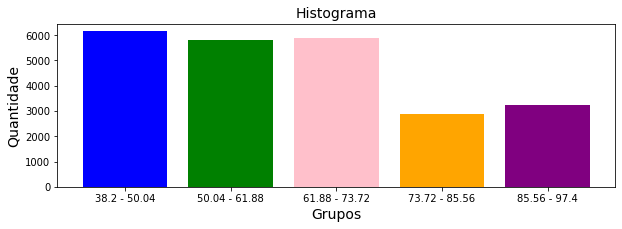

In [19]:
import matplotlib.pyplot as plt

leg_1 = str(round(soc_min, 2)) + " - " + str(round(limit_g1, 2))
leg_2 = str(round(limit_g1, 2)) + " - " + str(round(limit_g2, 2))
leg_3 = str(round(limit_g2, 2)) + " - " + str(round(limit_g3, 2))
leg_4 = str(round(limit_g3, 2)) + " - " + str(round(limit_g4, 2))
leg_5 = str(round(limit_g4, 2)) + " - " + str(round(limit_g5, 2))

plt.rcParams["figure.figsize"] = (10,3)
plt.bar(leg_1, grupo_1.count() , color='blue')
plt.bar(leg_2, grupo_2.count() , color='green')
plt.bar(leg_3, grupo_3.count() , color='pink')
plt.bar(leg_4, grupo_4.count() , color='orange')
plt.bar(leg_5, grupo_5.count() , color='purple')

plt.title('Histograma', fontsize=14)
plt.xlabel('Grupos', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)


No handles with labels found to put in legend.


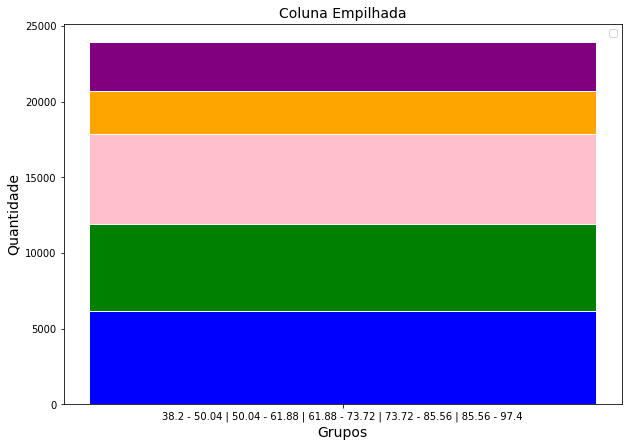

In [20]:
dataframe = pd.DataFrame({
    'Grupo': [leg_1, leg_2, leg_3,  leg_4, leg_5],
    'Quantidade': [grupo_1.count(),  grupo_2.count(),  grupo_3.count(),  grupo_4.count(),   grupo_5.count()]
})

barWidth = 1
#plot bars
legend = leg_1 + " | " + leg_2 + " | " +  leg_3 + " | " +  leg_4 + " | " +  leg_5

plt.figure(figsize=(10,7))
plt.bar(legend,  grupo_1.count(), color='blue', edgecolor='white', width=barWidth)
plt.bar(legend,  grupo_2.count(), bottom=grupo_1.count(), color='green', edgecolor='white', width=barWidth)
plt.bar(legend,  grupo_3.count(), bottom=grupo_1.count()+grupo_2.count(), color='pink', edgecolor='white', width=barWidth)
plt.bar(legend,  grupo_4.count(), bottom=grupo_1.count()+grupo_2.count()+grupo_3.count(), color='orange', edgecolor='white', width=barWidth)
plt.bar(legend,  grupo_5.count(), bottom=grupo_1.count()+grupo_2.count()+grupo_3.count()+grupo_4.count(), color='purple', edgecolor='white', width=barWidth)
plt.legend()
# Custom X axis
plt.title('Coluna Empilhada', fontsize=14)
plt.xlabel('Grupos', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

plt.show()

/home/alefe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


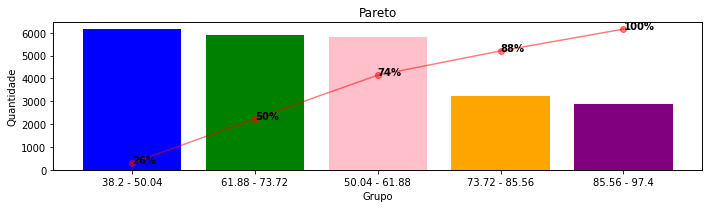

In [21]:
df = pd.DataFrame({
    'Grupo': [leg_1, leg_3, leg_2,  leg_4, leg_5],
    'Quantidade': [grupo_1.count(),  grupo_3.count(),  grupo_2.count(),  grupo_5.count(),   grupo_4.count()]
})

def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y,color=['blue','green','pink','orange','purple'])
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

pareto_plot(df, x='Grupo', y='Quantidade', title='Pareto')

In [22]:
data_2.to_csv('../Exports/bms-dataprocess.csv', sep=';')

In [23]:
data_2.head()


,Timestamp,Bstring1_Battery_Voltage,Bstring1_Battery_Current,Bstring1_Battery_Soc,Bstring1_Battery_Soh,Bstring1_Statistic_VoltageMean,Bstring1_Statistic_VoltageMax,Bstring1_Statistic_VoltageMin,Bstring1_Statistic_TemperatureMean,Bstring1_Statistic_TemperatureMax,...,Bstring1_Bmu_Temperature_278,Bstring1_Bmu_Temperature_279,Bstring1_Bmu_Temperature_280,Bstring1_Bmu_Temperature_281,Bstring1_Bmu_Temperature_282,Bstring1_Bmu_Temperature_283,Bstring1_Bmu_Temperature_284,Bstring1_Bmu_Temperature_285,Bstring1_Bmu_Temperature_286,Bstring1_Bmu_Temperature_287
0,2020-09-01T16:49:41,605.9,1.39,97.4,99,2.13,2.22,2.13,23.61,26,...,25,0,23,0,25,0,23,0,24,0
1,2020-09-01T16:49:42,605.9,1.39,97.4,99,2.13,2.22,2.13,23.61,26,...,25,0,23,0,25,0,23,0,24,0
2,2020-09-01T16:49:43,605.9,1.39,97.4,99,2.13,2.22,2.13,23.61,26,...,25,0,23,0,25,0,23,0,24,0
3,2020-09-01T16:49:44,605.9,1.39,97.4,99,2.13,2.22,2.13,23.61,26,...,25,0,23,0,25,0,23,0,24,0
4,2020-09-01T16:49:45,605.9,1.50,97.4,99,2.13,2.22,2.13,23.61,26,...,25,0,23,0,25,0,23,0,24,0


In [24]:
# Criar status de tensão status_voltage 
# Classificador: 
# Tensão: 

def defineVoltage(T):
    if T >= 0 and T < 510 or T > 730:
        return 0
    if T >= 693 and T <= 730:
        return 2
    if T >= 510 and T < 693:
        return 1



voltage_col = data_2['Bstring1_Battery_Voltage']
status_voltage = voltage_col.apply(lambda T: defineVoltage(T))
status_voltage.head()


0    1
1    1
2    1
3    1
4    1
Name: Bstring1_Battery_Voltage, dtype: int64

In [25]:
# # Criar status de tensão status_current 
# # Classificador: 
# # Corrente: 
# #     adequada: 1 entre -75 a 117 
# #     inadequada: 0 menor -75 e maior 117 

# current_col = data_2['Bstring1_Battery_Current']
# status_current = current_col.apply(lambda T: 1 if T > -75 and T <= 117 else 0)
# status_current.head()


In [26]:
# Criar status de soc status_SoC
# Classificador: 
# SoC: 

def defineStatusSoC(T):
    if T >= 0 and T < 20 or T > 90:
        return 0
    if T >= 20 and T < 30:
        return 2
    if T >= 30 and T <= 90:
        return 1

soc_col = data_2['Bstring1_Battery_Soc']
status_soc = soc_col.apply(lambda T: defineStatusSoC(T))

status_soc.head()


0    0
1    0
2    0
3    0
4    0
Name: Bstring1_Battery_Soc, dtype: int64

In [27]:
# Criar status de temperatura status_tempCel
# Classificador: 
# Temperatura:

def getNameColunsTemp(qtsColumns):
    columns = []
    for x in range(qtsColumns + 1):
        columns.append('Bstring1_Bmu_Temperature_' + str(x))
    return columns

def defineTemp(matrixTemp):
    columns = []
    value = ''
    for row in matrixTemp:
        for x in row:
            if x >= 50 or x > 0 and x < 15:
                value = 0
                break
            if x >= 15 and x < 40:
                value = 1
            if x >= 40 and  x < 50:
                value = 2
        columns.append(value)
    return columns

getNameColunsTemp(287)
df_TempMatrix = data_2[getNameColunsTemp(287)]
matrixTemp = df_TempMatrix .to_numpy()
data_tempCell = defineTemp(matrixTemp)
print(len(data_tempCell))
data = {
    'status_tempCell': data_tempCell
}
status_tempCell = pd.DataFrame(data) 

23939


In [28]:
# Criar status de tensão da celula status_voltegeCel
# Classificador: 
# Voltage:

def getNameColunsVoltage(qtsColumns):
    columns = []
    for x in range(qtsColumns + 1):
        columns.append('Bstring1_Bmu_Voltage_' + str(x))
    return columns

# Limite máximo de tensão por célula 2.7
# Limite mínimo de tensão por célula 1.75

def defineVoltage(matrixVoltage):
    columns = []
    value = ''
    for row in matrixVoltage:
        for x in row:
            if x > 2.7 or x > 0 and x < 1.75:
                value = 0
                break
            # if x > 1.7 and x <= 2.6:
            if x >= 1.75 and x <= 2.15:
                value = 2
            # if x >= 1.7  and x <= 1.75 or x > 2.6  and  x <= 2.7:
            if x > 2.15  and  x <= 2.7:
                value = 1
        columns.append(value)
    return columns

getNameColunsVoltage(287)
df_voltageMatrix = data_2[getNameColunsVoltage(287)]
matrixVoltage = df_voltageMatrix .to_numpy()
data_voltageCell = defineVoltage(matrixVoltage)
print(len(data_voltageCell))
data = {
    'status_voltageCell': data_voltageCell
}
status_voltageCell = pd.DataFrame(data) 

23939


In [29]:
# Adiciona todas a colunas de classificação em data_2

data_2['status_voltage'] = status_voltage
data_2['status_voltageCell'] = status_voltageCell
data_2['status_soc'] = status_soc
data_2['status_tempCell'] = status_tempCell

In [30]:
def defineAction(matrixStatus):
    columns = []
    value = ''
    aux = 0
    for row in matrixStatus:
        for col in row:
            if col == 0:
                value = 0
            elif col == 1:
                aux = aux + 1
                if aux > 1:
                    aux = 0
                    value = 2
            elif value!= 0 or value!=1:
                value = 1
        columns.append(value)         
    return columns


df_matrixStatus = data_2[['status_voltage','status_voltageCell','status_soc','status_tempCell']]
matrixStatus = df_matrixStatus.to_numpy()
data_action = defineAction(matrixStatus)
data = {
    'action': data_action
}
action = pd.DataFrame(data)
data_2['action'] = action
data_2.to_csv('../Exports/bms-dataprocess-classify.csv', sep=';')

In [31]:
features = ['status_voltage','status_voltageCell','status_soc','status_tempCell']

# Definição da variável-alvo
target = ['action']

# Preparação dos argumentos para os métodos da biblioteca ``scikit-learn``
X = data_2[features]
y = data_2[target]

In [32]:
X.head()

,status_voltage,status_voltageCell,status_soc,status_tempCell
0,1,1,0,1
1,1,1,0,1
2,1,1,0,1
3,1,1,0,1
4,1,1,0,1


In [33]:
y.head()

,action
0,0
1,2
2,0
3,2
4,0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=337)
decision_tree = DecisionTreeClassifier()

X_train.head()

,status_voltage,status_voltageCell,status_soc,status_tempCell
15947,1,1,1,1
13379,1,1,1,1
17836,1,1,1,1
19783,1,1,1,1
16686,1,1,1,1


In [35]:
y_train

,action
15947,2
13379,2
17836,2
19783,2
16686,2
...,...
1087,2
4539,2
12729,2
14402,2


In [36]:
decision_tree.fit(
   X_train,
   y_train
)

DecisionTreeClassifier()

In [37]:
# Realização de teste cego no modelo criado
y_pred = decision_tree.predict(X_test)

In [38]:
X_test.head()

,status_voltage,status_voltageCell,status_soc,status_tempCell
10367,1,2,1,1
10160,1,2,1,1
13954,1,1,1,1
6635,1,2,1,1
17487,1,1,1,1


In [39]:
print(y_pred)

[2 2 2 ... 2 2 2]


In [40]:
from sklearn.metrics import accuracy_score

# Acurácia alcançada pela árvore de decisão
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))

Acurácia: 97.0%


In [41]:
data_2.head()

,Timestamp,Bstring1_Battery_Voltage,Bstring1_Battery_Current,Bstring1_Battery_Soc,Bstring1_Battery_Soh,Bstring1_Statistic_VoltageMean,Bstring1_Statistic_VoltageMax,Bstring1_Statistic_VoltageMin,Bstring1_Statistic_TemperatureMean,Bstring1_Statistic_TemperatureMax,...,Bstring1_Bmu_Temperature_283,Bstring1_Bmu_Temperature_284,Bstring1_Bmu_Temperature_285,Bstring1_Bmu_Temperature_286,Bstring1_Bmu_Temperature_287,status_voltage,status_voltageCell,status_soc,status_tempCell,action
0,2020-09-01T16:49:41,605.9,1.39,97.4,99,2.13,2.22,2.13,23.61,26,...,0,23,0,24,0,1,1,0,1,0
1,2020-09-01T16:49:42,605.9,1.39,97.4,99,2.13,2.22,2.13,23.61,26,...,0,23,0,24,0,1,1,0,1,2
2,2020-09-01T16:49:43,605.9,1.39,97.4,99,2.13,2.22,2.13,23.61,26,...,0,23,0,24,0,1,1,0,1,0
3,2020-09-01T16:49:44,605.9,1.39,97.4,99,2.13,2.22,2.13,23.61,26,...,0,23,0,24,0,1,1,0,1,2
4,2020-09-01T16:49:45,605.9,1.50,97.4,99,2.13,2.22,2.13,23.61,26,...,0,23,0,24,0,1,1,0,1,0


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os

X2 = data_2[['Bstring1_Battery_Soc', 'z']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

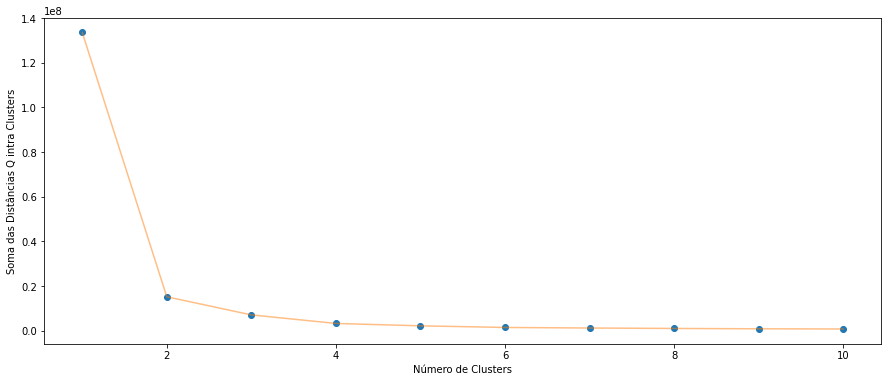

In [43]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

In [44]:
# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 4))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=24000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(max_iter=24000, n_clusters=4, n_jobs=None, precompute_distances='auto')

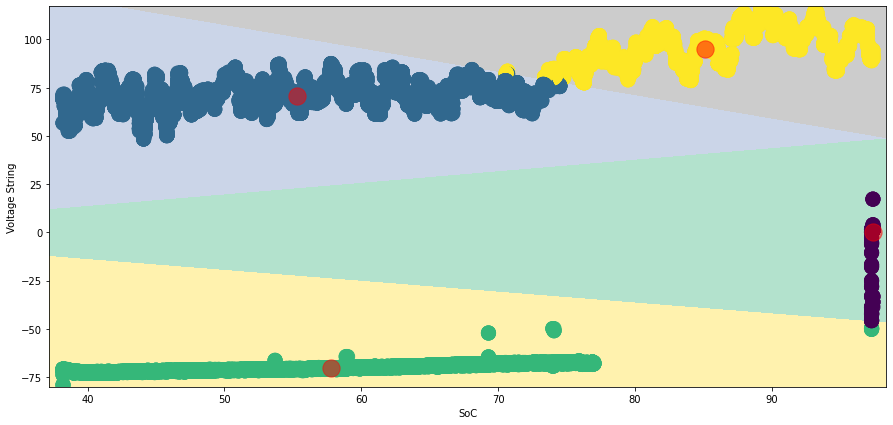

In [45]:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Bstring1_Battery_Soc' ,y = 'Bstring1_Battery_Current' , data = data_2 , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Voltage String') , plt.xlabel('SoC')
plt.show()

In [46]:
data_2["clusters"] = algorithm.labels_
data_2.head()

,Timestamp,Bstring1_Battery_Voltage,Bstring1_Battery_Current,Bstring1_Battery_Soc,Bstring1_Battery_Soh,Bstring1_Statistic_VoltageMean,Bstring1_Statistic_VoltageMax,Bstring1_Statistic_VoltageMin,Bstring1_Statistic_TemperatureMean,Bstring1_Statistic_TemperatureMax,...,Bstring1_Bmu_Temperature_284,Bstring1_Bmu_Temperature_285,Bstring1_Bmu_Temperature_286,Bstring1_Bmu_Temperature_287,status_voltage,status_voltageCell,status_soc,status_tempCell,action,clusters
0,2020-09-01T16:49:41,605.9,1.39,97.4,99,2.13,2.22,2.13,23.61,26,...,23,0,24,0,1,1,0,1,0,0
1,2020-09-01T16:49:42,605.9,1.39,97.4,99,2.13,2.22,2.13,23.61,26,...,23,0,24,0,1,1,0,1,2,0
2,2020-09-01T16:49:43,605.9,1.39,97.4,99,2.13,2.22,2.13,23.61,26,...,23,0,24,0,1,1,0,1,0,0
3,2020-09-01T16:49:44,605.9,1.39,97.4,99,2.13,2.22,2.13,23.61,26,...,23,0,24,0,1,1,0,1,2,0
4,2020-09-01T16:49:45,605.9,1.50,97.4,99,2.13,2.22,2.13,23.61,26,...,23,0,24,0,1,1,0,1,0,0


In [52]:
df_group = data_2[['Bstring1_Battery_Soc','Bstring1_Battery_Current' ,'clusters'].groupby("clusters")
df_group.describe()

Bstring1_Battery_Soc                                            \
                        count       mean        std    min    25%   50%   
clusters                                                                  
0                      1404.0  97.394658   0.022495  97.30  97.40  97.4   
1                      7886.0  55.328903  10.387530  38.20  46.09  55.0   
2                     10868.0  57.791956  11.296374  38.20  48.09  57.9   
3                      3781.0  85.189778   6.960760  70.59  79.19  84.9   

                      Bstring1_Battery_Current                              \
            75%   max                    count       mean       std    min   
clusters                                                                     
0         97.40  97.4                   1404.0   0.241275  6.852653 -45.79   
1         64.30  74.5                   7886.0  70.566609  6.710803  48.40   
2         67.59  97.3                  10868.0 -70.190493  1.825206 -79.09   
3         91.19  97.4                   3781.0  95.237442  9.229844  77.50   

                                       
            25%     50%    75%    max  
clusters                               
0          1.39   1.500    1.6   17.2  
1         66.59  70.900   74.9   87.5  
2        -71.59 -70.545  -68.7  -49.7  
3         87.50  95.090  102.8  116.2